# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# **LOAD DATA**

In [ ]:
# Load dataset
data = pd.read_csv('diabetes.csv')

# **PREPROCESSING**

**Data Understanding**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [ ]:
data.isna().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,77
Age,154
Outcome,0


In [ ]:
(data.isna().sum()/len(data)) * 100

,0
Pregnancies,10.026042
Glucose,14.973958
BloodPressure,20.052083
SkinThickness,4.947917
Insulin,25.000000
BMI,29.947917
DiabetesPedigreeFunction,10.026042
Age,20.052083
Outcome,0.000000


In [ ]:
#check missing values
def missing_value(df):
    missing_value = df.isnull().sum()
    total_cells = df.shape[0]
    missing_percentage = (missing_value/total_cells) * 100
    return pd.DataFrame({
        'Missing Values': missing_value,
        'Missing Percentage': missing_percentage
    })

missing_value(data)

,Missing Values,Missing Percentage
Pregnancies,77,10.026042
Glucose,115,14.973958
BloodPressure,154,20.052083
SkinThickness,38,4.947917
Insulin,192,25.000000
BMI,230,29.947917
DiabetesPedigreeFunction,77,10.026042
Age,154,20.052083
Outcome,0,0.000000


# **1. Imputasi missing value dengan mean, median, dan modus**

In [ ]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
# Apply imputations
data_mean_imputed = data.copy()
data_median_imputed = data.copy()
data_mode_imputed = data.copy()

In [ ]:
# Impute the missing values for each method
for column in data.columns[:-1]:  # excluding 'Outcome' which is the target
    data_mean_imputed[column] = mean_imputer.fit_transform(data_mean_imputed[[column]])
    data_median_imputed[column] = median_imputer.fit_transform(data_median_imputed[[column]])
    data_mode_imputed[column] = mode_imputer.fit_transform(data_mode_imputed[[column]])

In [ ]:
data_mean_imputed.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data_mean_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,120.462481,72.0,35.0,0.0,31.99368,0.627000,33.166124,1
1,1.0,85.000000,66.0,29.0,0.0,31.99368,0.351000,31.000000,0
2,8.0,183.000000,64.0,0.0,0.0,23.30000,0.672000,32.000000,1
3,1.0,89.000000,66.0,23.0,94.0,28.10000,0.167000,21.000000,0
4,0.0,120.462481,40.0,35.0,168.0,43.10000,0.465363,33.000000,1


In [ ]:
data_median_imputed.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data_median_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,116.0,72.0,35.0,0.0,32.15,0.627,29.0,1
1,1.0,85.0,66.0,29.0,0.0,32.15,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.30,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.10,0.167,21.0,0
4,0.0,116.0,40.0,35.0,168.0,43.10,0.365,33.0,1


In [ ]:
data_mode_imputed.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data_mode_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,100.0,72.0,35.0,0.0,31.2,0.627,22.0,1
1,1.0,85.0,66.0,29.0,0.0,31.2,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,100.0,40.0,35.0,168.0,43.1,0.207,33.0,1


# **2. Cek korelasi antar variabel dengan heatmap**

**EDA**

In [44]:
# 2. Cek korelasi antar variabel dengan heatmap
corr_matrix = data_mean_imputed.corr()

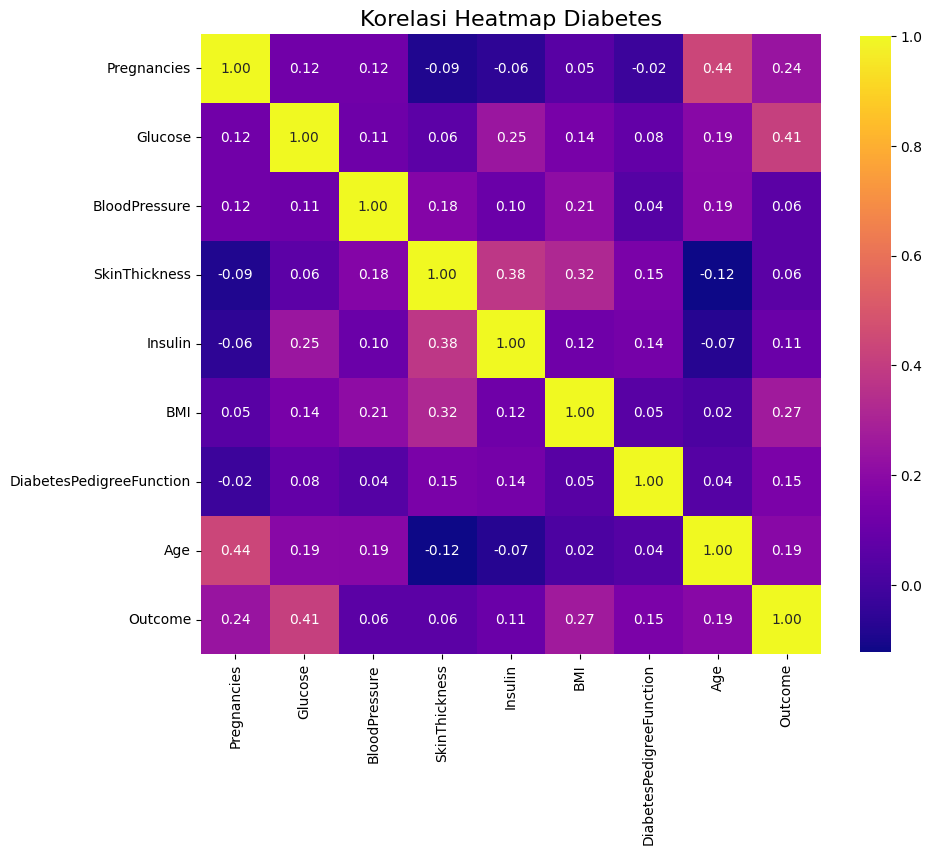

In [45]:
# Plot heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(corr_matrix, annot=True, ax=ax, cmap='plasma', cbar_kws={'shrink': 0.8}, square=True, fmt='.2f')
plt.title('Korelasi Heatmap Diabetes', fontsize=16)
plt.show()

# **3. Lakukan imbalance handling dengan undersampling**

In [46]:
# Memisahkan fitur input dan variabel target
X = data_mean_imputed.drop('Outcome', axis=1)
y = data_mean_imputed['Outcome']

In [47]:
# Menangani ketidakseimbangan dengan undersampling pada kelas mayoritas
X_mayoritas = X[y == 0]
X_minoritas = X[y == 1]

<ipython-input-48-ef022839da2a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=y, palette="Set2")


<Axes: xlabel='count', ylabel='Outcome'>

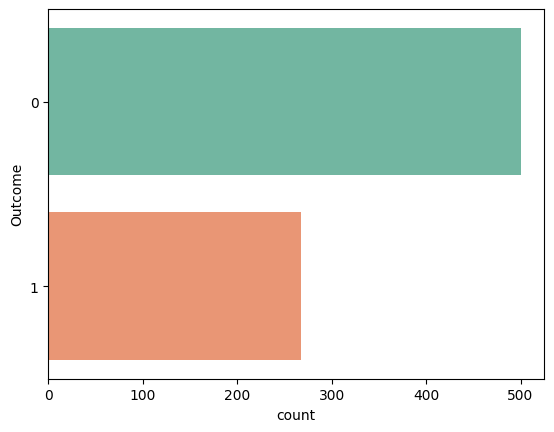

In [48]:
sns.countplot(data=data, y=y, palette="Set2")

In [ ]:
# Proses undersampling pada kelas mayoritas agar sesuai dengan kelas minoritas
X_mayoritas_undersampled, y_mayoritas_undersampled = resample(X_mayoritas,
                                                              y[y == 0],
                                                              replace=False,  # tanpa penggantian
                                                              n_samples=len(X_minoritas),  # samakan dengan kelas minoritas
                                                              random_state=42)

In [ ]:
# Penggabungan kelas minoritas dengan kelas mayoritas yang telah di-undersample
X_resampled = pd.concat([X_minoritas, X_mayoritas_undersampled])
y_resampled = pd.concat([y[y == 1], y_mayoritas_undersampled])

Outcome
1    268
0    268
Name: count, dtype: int64


<ipython-input-14-046f2f01467e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_resampled, y=y_resampled, palette="Set2")


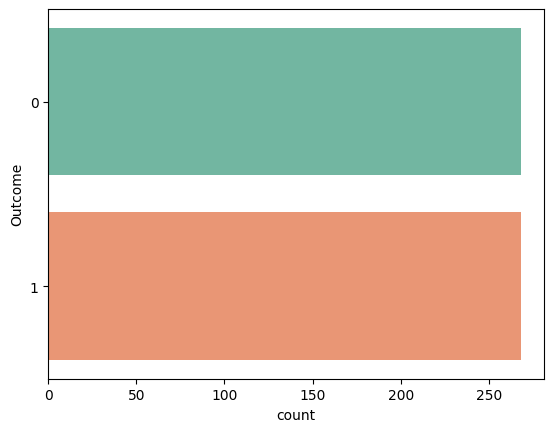

In [ ]:
sns.countplot(data=X_resampled, y=y_resampled, palette="Set2")

# Cek keseimbangan kelas setelah undersampling
print(y_resampled.value_counts())

# **4. Lakukan scaling dengan robust scaler dan minmax**

# **Scalling Data**

**a. Robust Scaler**

In [ ]:
robust_scaler = RobustScaler()
data_mean = X_resampled.copy()

data_mean[data_mean.columns.difference(['Outcome'])] = robust_scaler.fit_transform(data_mean[data_mean.columns.difference(['Outcome'])])

print(data_mean.tail())

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
149    -0.360637 -0.923105       0.086726       -0.15625 -0.807123  0.000000   
232    -0.560637 -1.256439       0.920060        0.09375 -0.418672 -1.608215   
384    -0.560637  0.000000       0.000000        0.06250  0.347733 -1.876507   
673     0.000000  0.000000       0.000000        0.40625  1.712562  6.172273   
150    -0.560637  0.470834       0.420060        0.87500  1.334609  1.318615   

     DiabetesPedigreeFunction       Age  
149                 -0.964160 -0.930510  
232                  0.435699 -0.930510  
384                 -0.581869 -0.680510  
673                  1.270555  0.000000  
150                  0.105027 -0.763844  


**b. Min Max Scaler**

In [ ]:
minmax_scaler = MinMaxScaler()
data_mean = X_resampled.copy()

data_mean[data_mean.columns.difference(['Outcome'])] = minmax_scaler.fit_transform(data_mean[data_mean.columns.difference(['Outcome'])])

print(data_mean.tail())

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
149     0.117647  0.452261       0.614035       0.171717  0.000000  0.476806   
232     0.058824  0.396985       0.701754       0.252525  0.068140  0.378539   
384     0.058824  0.605339       0.604906       0.242424  0.202578  0.362146   
673     0.223717  0.605339       0.604906       0.353535  0.441989  0.853949   
150     0.058824  0.683417       0.649123       0.505051  0.375691  0.557377   

     DiabetesPedigreeFunction       Age  
149                  0.000445  0.019608  
232                  0.222272  0.019608  
384                  0.061024  0.078431  
673                  0.354566  0.238551  
150                  0.169872  0.058824  
